In [1]:
import numpy as np
import pylab as pl
import NearestNeighbour as NN
from sklearn.utils import shuffle
import matplotlib.pyplot as plotter

In [2]:
from pickle import *
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        return dict

In [3]:
def scatterplot2(scores,decision,marker1='o',marker2='^',label1='',label2='',transp=1.0):
    scores1 = scores[decision == 1]
    scores2 = scores[decision == 0]
    pl.scatter(scores1[:,0], scores1[:,1],edgecolors='face', marker=marker1, label=label1, c='g',alpha=transp)
    pl.scatter(scores2[:,0], scores2[:,1],edgecolors='face', marker=marker2, label=label2, c='r',alpha=transp)

In [4]:
datadict = unpickle("../Data/cifar-100-python/train")

In [5]:
xTrain = datadict[b'data']
yTrain = datadict[b'coarse_labels']
#xTrain = xTrain.reshape(50000,3,32,32).transpose(0,2,3,1).astype("float")

In [6]:
sortindex = np.argsort(yTrain)

In [7]:
xtr=[]
ytr=[]

In [8]:
#x = 0;
for i in range(0,49995,5):
    xtr.append(xTrain[sortindex[i]])
    ytr.append(yTrain[sortindex[i]])
    #x += 1
print(np.array(xtr).shape)

(9999, 3072)


In [9]:
xtr, ytr = shuffle(xtr,ytr,random_state=0)

In [10]:
valxtr1,valxtr2,valxtr3 = np.split(xtr,[3333,6666])
valytr1,valytr2,valytr3 = np.split(ytr,[3333,6666])

In [11]:
trainxtr1 = np.split(xtr,[6666])[0]
trainxtr2 = np.split(xtr,[3333])[1]
trainxtr3 = xtr[:3333]
trainxtr3 = np.concatenate([trainxtr3,xtr[6666:]])

trainytr1 = np.split(ytr,[6666])[0]
trainytr2 = np.split(ytr,[3333])[1]
trainytr3 = ytr[:3333]
trainytr3 = np.concatenate([trainytr3,ytr[6666:]])

 k =  1
accuracy cross1  0.12061206120612061
accuracy cross2  0.12451245124512451
accuracy cross3 0.12901290129012902
 k =  2
accuracy cross1  0.11191119111911191
accuracy cross2  0.1113111311131113
accuracy cross3 0.1266126612661266
 k =  3
accuracy cross1  0.11701170117011701
accuracy cross2  0.11371137113711371
accuracy cross3 0.12811281128112811
 k =  4
accuracy cross1  0.11791179117911792
accuracy cross2  0.1149114911491149
accuracy cross3 0.1344134413441344
 k =  5
accuracy cross1  0.11821182118211822
accuracy cross2  0.11971197119711971
accuracy cross3 0.1335133513351335
 k =  6
accuracy cross1  0.11701170117011701
accuracy cross2  0.12091209120912091
accuracy cross3 0.1251125112511251
 k =  7
accuracy cross1  0.11641164116411641
accuracy cross2  0.111011101110111
accuracy cross3 0.1275127512751275
 k =  8
accuracy cross1  0.11671167116711671
accuracy cross2  0.11011101110111012
accuracy cross3 0.132013201320132
 k =  9
accuracy cross1  0.11611161116111611
accuracy cross2  0.115

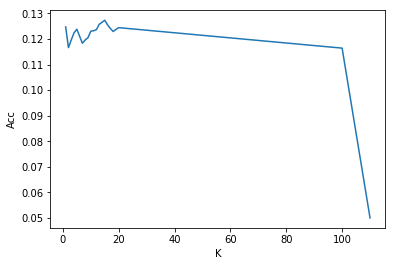

In [12]:
knnc = NN.NearestNeighbour()
q=0
klist = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,100,3000]
TotalAccuracies = [0]*len(klist)
for k in klist:
    print(" k = ", k)
    for i in range(3):
        if i == 0: 
            knnc.train(trainxtr1,trainytr1)
            ypred = knnc.predict(valxtr3, k)
            yacc = float(np.sum(ypred==valytr3))/3333.0
            print("accuracy cross1 ", yacc)
        elif i == 1: 
            knnc.train(trainxtr2,trainytr2)
            ypred1 = knnc.predict(valxtr1, k)
            yacc1 = float(np.sum(ypred1==valytr1))/3333.0
            print("accuracy cross2 ", yacc1)
        else: 
            knnc.train(trainxtr3,trainytr3)
            ypred2 = knnc.predict(valxtr2, k)
            yacc2 = float(np.sum(ypred2==valytr2))/3333.0
            print("accuracy cross3", yacc2)
    TotalAccuracies[q] = np.mean([yacc,yacc1,yacc2])
    q += 1
    

klist = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,100,110]
print("Graph to Show Highest K")
plotter.plot(klist,TotalAccuracies)
plotter.xlabel('K')
plotter.ylabel('Acc')
plotter.show()

Graph to Show Highest K


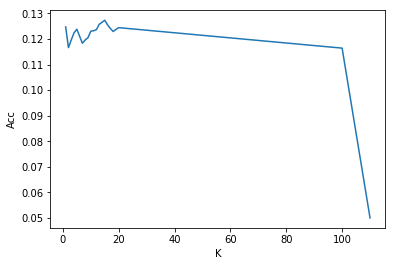

In [13]:
klist = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,100,110]
print("Graph to Show Highest K")
plotter.plot(klist,TotalAccuracies)
plotter.xlabel('K')
plotter.ylabel('Acc')
plotter.show()

In [14]:
datadict = unpickle("../Data/cifar-100-python/test")

In [15]:
xTest = datadict[b'data']
yTest = datadict[b'coarse_labels']

In [16]:
Bestk = 15
count = 0
CountPerClass = [0]*20
knnt = NN.NearestNeighbour()
knnt.train(xTrain,np.array(yTrain))
ytestpred = knnt.predict(xTest,Bestk)

for i in ytestpred:
    if(ytestpred[count] == yTest[count]):
        CountPerClass[i] += 1
    count += 1
print("CCRn")
for j in range(20):
    print("Class", j+1, "Accuracy is", CountPerClass[j], "/500 ", ", acc = ", float(CountPerClass[j])/500)
print("ACCR" , float(np.sum(ytestpred == yTest))/float(len(yTest)))

CCRn
Class 1 Accuracy is 64 /500  , acc =  0.128
Class 2 Accuracy is 93 /500  , acc =  0.186
Class 3 Accuracy is 22 /500  , acc =  0.044
Class 4 Accuracy is 212 /500  , acc =  0.424
Class 5 Accuracy is 100 /500  , acc =  0.2
Class 6 Accuracy is 43 /500  , acc =  0.086
Class 7 Accuracy is 66 /500  , acc =  0.132
Class 8 Accuracy is 72 /500  , acc =  0.144
Class 9 Accuracy is 8 /500  , acc =  0.016
Class 10 Accuracy is 94 /500  , acc =  0.188
Class 11 Accuracy is 312 /500  , acc =  0.624
Class 12 Accuracy is 30 /500  , acc =  0.06
Class 13 Accuracy is 17 /500  , acc =  0.034
Class 14 Accuracy is 166 /500  , acc =  0.332
Class 15 Accuracy is 23 /500  , acc =  0.046
Class 16 Accuracy is 20 /500  , acc =  0.04
Class 17 Accuracy is 41 /500  , acc =  0.082
Class 18 Accuracy is 71 /500  , acc =  0.142
Class 19 Accuracy is 7 /500  , acc =  0.014
Class 20 Accuracy is 29 /500  , acc =  0.058
ACCR 0.149
